### Ch 4 - Classification

#### 4.0 Intro

- Regression assumes quantitative outputs. Classification is for categorical/qualitative outputs.

#### 4.1 Overview

- Section just shows an example of classification for Credit Card defaulting given datapoints about balance and income

#### 4.2 Why not Linear Regression?

- It would not make sense to assign eg. 3 independent outcomes 1, 2, 3 because that assumes that the difference between 1 and 2 is the same as the difference between 2 and 3 (which is not the case if they're independent by definition!)
- If there was a natural order (such as mild, moderate, severe), then a 1, 2, 3 coding would be reasonable but for most classification purposes, this isnt't the case.
- For a binary (two level) qualitative response, a 0/1 coding is feasible, classifying on the border of hat Y > or < 0.5. Regression by least squares is possible, but some results would be outside of the [0, 1] interval, making them hard to interpret as probabilities. We achieve similar results from a binary linear regression model if we use linear discriminant analysis.


In summary:
- A regression model cannot accomodate a qualitative response with >2 classes
- A regression method will not provide meaningful estiamtes of Pr(Y|X) even with two classes.

#### 4.3 Logistic Regression

- Logistic regression models the probability that Y belongs to a particular category
- Pr(Y = 1|X) eg. Pr(default = Yes|balance) 
    - Abbreviated as p(X), ranges [0, 1]
    - Classification can be set as p(X) > or < 0.5, but the specific threshold can be changed depending on interpretation eg. p(balance) > 0.1 instead of 0.5 for predicting defaulting.
  

- If we used linear regression, we might expect the range to be out of [0, 1]. To avoid this, we must model p(X) with a function such that  $0 < f(X) < 1, \forall X$
- In logistic regression, we use the logistic function:
$$p(X) = \frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1X}}$$

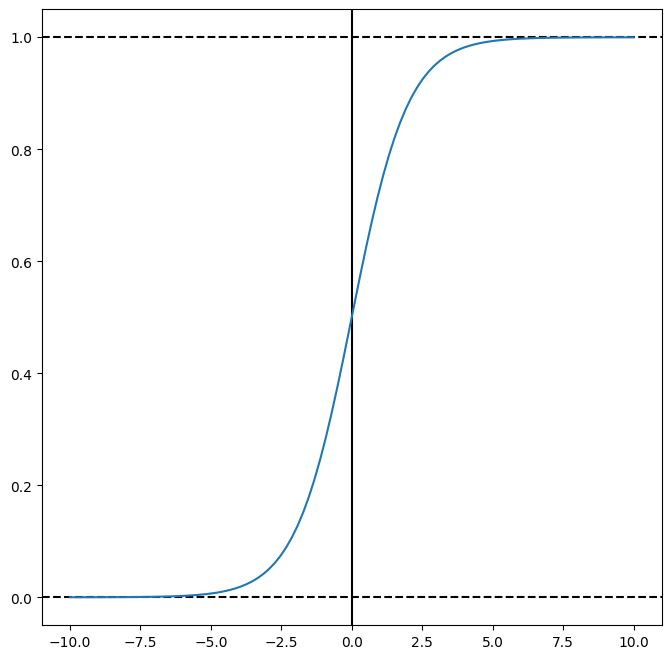

In [83]:
from matplotlib.pyplot import subplots
import numpy as np

X = np.linspace(-10,10,100)
Y = np.exp(X)/(1+np.exp(X))
fig, ax = subplots(figsize=(8,8))
ax.axvline(x=0, color='black')
ax.axhline(y=0, color = 'black', ls='--')
ax.axhline(y=1, color = 'black', ls='--')
ax.plot(X,Y);


- To fit the model, we use a method called maximum likelihood (discussed later). 
- After manipulation, we note that:
$$\frac{p(X)}{1-p(X)}=e^{\beta_0 + \beta_1X}$$
The expression $\frac{p(X)}{1-p(X)}$ is the odds and can take any value between 0 and inf.
- By taking log of both sides, we arrive at
$$\text{log}\left( \frac{p(X)}{1-p(X)}\right) = \beta_0 + \beta_1X$$
The left side is the logit or logodds. - The logistic model has a logit linear in X. This means that increasing the X by one unit changes the log odds by beta 1 (cf linear regression, increasing X by one unit changes Y by beta 1 on average)
- If beta 1 is positive, then increasing X will increase p(X), and vice versa

**Estimating the Regression Coefficients**

- While there is a non-linear least squares method to estimate the coefficients, maximum likelihood is preferred because of "better statistical properties".
- Intuition: we want estimates for $\beta_0$ and $\beta_1$ such that the predicted probability $\hat{p}(x_i)$ is as close as possible to the observed Y from data points (eg. 0 for all datapoints for case 1 and 1 for all datapoints for case 2).
- This intution is formalised by the likelihood function:
$$\ell(\beta_0, \beta_1) = \prod_{i:y_i=1}p(x_i) \prod_{i{'}:y_{i^{'}}=0}(1-p(x_{i^{'}}))$$
This estimates $\hat{\beta_0}$ and $\hat{\beta_1}$ are chosen to maximise the function.
- The z-statistic for logistic regression plays the same role as the t-statistic. It is equal to $\hat{\beta_1}/\text{SE}(\hat{\beta_1})$ for $\beta_1$.
  - Higher z-statistics provide evidence against H0 of beta 1 = 0. 
  - Null hypothesis implies $p(X) = \frac{e^{\beta_0}}{1+e^{\beta_0}}$, not depending on beta 1.



**Making predictions**

- We can subsitute X in the equation for $\hat{p}(X)$ to have an estimate of the probability that X belongs in one class.
- Qualitative predictors can be used like in linear regression by the dummy variable approach 

**Multiple Logistic Regression**

- The logit expression can be generalised for multiple logistic regression:
$$\text{log}\left(\frac{p(X)}{1-p(X)}\right) = \beta_0 + \beta_1X_1 + \cdots + \beta_pX_p$$
$$p(X) = \frac{e^{\beta_0 + \beta_1X_1 + \cdots + \beta_pX_p}}{1+e^{\beta_0 + \beta_1X_1 + \cdots + \beta_pX_p}}$$
where $X = X_1, ...,X_p$ are predictors


**Making predictions**

- The book illustrates an example for how in two different cases, the dummy variable for a qualitative can be both positive or negative. This will change depending on if the averages for Y change between more or less predictors. 
- In the specific example, it was because student and balance are correlated, and greater balances are associated with high default rates. So, while based on balance alone, students are more likely to default (as they tend to have a higher balance than non students). Based on both a fixed value of balance and income, any individual student is less likely to default than non-students. This phenomenon is called confounding.

**Multinomial logistic regression**

- The logistic regression only allows for K = 2 classes for Y. It is possible to extend this to K > 2, referred to as multinomial logistic regression. We first select one class as the baseline. Then, without loss of generality, we select the Kth class, and replace the model with the following
$$\text{Pr}(Y=k|X=x)=\frac{e^{\beta_{k0}+\beta_{k1}x_1+\cdots+\beta_{kp}x_p}}{1+\sum_{l=1}^{K-1}e^{\beta_{l0}+\beta_{l1}x_1+\cdots+\beta_{lp}x_p}}$$
for k = 1 to K-1. For k=K, use:
$$\text{Pr}(Y=k|X=x)=\frac{1}{1+\sum_{l=1}^{K-1}e^{\beta_{l0}+\beta_{l1}x_1+\cdots+\beta_{lp}x_p}}$$
It can be shown that:
$$\text{log}\left(\frac{\text{Pr}(Y=k|X=x)}{\text{Pr}(Y=K|X=x)}\right)=\beta_{k0}+\beta_{k1}x_1+\cdots+\beta_{kp}x_p$$
Above bears resemblance to the logit equation for two-class logistic regression. It shows that the log odds between any pair of classes is linear in the features.
- In the equations above, it doesn't technically matter what the Kth class is set as for the baseline. All that changes is the interpretations. The predictions and log odds between any pairs of classes will be the same.
- Though, it should still be done with care since intepretation of the coefficients is done with respect to the baseline. 
- To interpret $\beta_{\text{case 1}j}$, we say that for every one-unit increase of $X_j$, then $\frac{\text{Pr}(\text{case 1})}{\text{Pr}(\text{base case})}$ increases by $e^{\beta_{\text{case 1}j}}$
- An alternative to multinomial logistic regression is softmax coding. The fitted values, log odds, and other key model outputs are the same regardless of coding. In softmax coding, the K classes are treated symmetrically rather than assigning a base line. We assume that for k = 1, ..., K:
$$\text{Pr}(Y=k|X=x)=\frac{e^{\beta_{k0}+\beta_{k1}x_1+\cdots+\beta_{kp}x_p}}{\sum_{l=1}^{K-1}e^{\beta_{l0}+\beta_{l1}x_1+\cdots+\beta_{lp}x_p}}$$
- The log odds ratio between class k and class k' is therefore:
$$\text{log}\left(\frac{\text{Pr}(Y=k|X=x)}{\text{Pr}(Y=k'|X=x)}\right)=(\beta_{k0}-\beta_{k'0})+(\beta_{k1}-\beta_{k'1})x_1+\cdots+(\beta_{kp}-\beta_{k'p})x_p$$

#### 4.4 Generative Models for Classification

- After considering logistic regression, we now consider an alternative an less direct approach to estimate the distribution of response Y given predictors X. 
- In this approach, the distribution of predictors X for each response class of Y. We then use Bayes' theorem to flip these into estimates for $\text{Pr}(Y=k|X=x)$. When the distribution of X for each class is assumed to follow normal, the model is similar to logistic regression:
- The problem with logistic regression is that when there is a lot of separation between the classes, logistic regression becomes unstable. This is avoided in these other methods. 
- If the distribution of predictors X is normal, and we have a small sample size, then these other methods may be more accurate.
- These other methods can be extended to the case of > 2 Y classes

**Basic Bayesian**
- Suppose we want to classify an x into one of K classes, K >= 2.  So, Y takes on K possible distinct, unordered values.
- Let $\pi_k \equiv \text{Pr}(Y=k)$ represent the overall or prior probability that a random observation is from the kth class. 
- Let $f_k(X) \equiv \text{Pr}(X|Y=k)$ be the density function of X for an observation that comes from the kth class. f_k(X) is high if there is a high probability that an observation in the kth class has X $\approx$ x
- Bayes' theorem states that
$$\text{Pr}(Y=k|X=x) = \frac{\pi_kf_k(x)}{\sum_{l=1}^K\pi_lf_l(x)}$$
- We define $p_k(x) = \text{Pr}(Y=k|X=x)$. This is the _posterior_ probability that an observation X=x belongs to the kth class. (Probability in kth class given x).
- By using Bayes' theorem, we can get a good estimate for the posterior by estimating the variables in the equation. Estimating $\pi_k$ is easy if we have a random sample from a population, as we can compute the fraction of the training observations belonging to the kth class. Estimating the density fraction is difficult, and usually requires some simplifying assumptions.
- We have three different estimators for $f_k(x)$: linear discriminant analysis, quadratic discriminant analysis, and naive bayes.

**Linear Discriminant Analysis for p = 1**

- Let's start assuming we have one predictor. To estimate $f_k(x)$, we assume it is normal or Gaussian. 
- The normal density takes the following:
$$f_k(x)=\frac{1}{\sqrt{2\pi}\sigma_k}\text{exp}\left(-\frac{1}{2\sigma_k^2}(x-\mu_k)^2\right)$$
with $\mu_k \text{ and } \sigma_k^2$ are mean and variance parameters for kth class respectively. Assumed that there is a shared variance for all K classes $(\sigma_1^2 = \cdots = \sigma_K^2)$
- When substituted into p_k(x):
$$p_k(x)=\frac{\pi_k \frac{1}{\sqrt{2\pi}\sigma_k}\text{exp}\left(-\frac{1}{2\sigma_k^2}(x-\mu_k)^2\right)}{\sum_{l=1}^K\pi_l\frac{1}{\sqrt{2\pi}\sigma_k}\text{exp}\left(-\frac{1}{2\sigma_k^2}(x-\mu_l)^2\right)}$$
- The Bayes classifier involves assigning an observation X=x to the class for which p_k(x) is largest. If we take the log for the above equation, this is equivalent to assigning the observation to the class for which the following is largest:
$$\delta_k(x)=x\cdot\frac{\mu_k}{\sigma^2}-\frac{\mu_k^2}{2\sigma^2}+\log(\pi_k)$$
- It's "Linear" Discriminant analysis since the discriminant function $\hat{\delta_k}(x)$ are linear functions of x
- The Bayes decision boundary is the point for which $\delta_1(x) = \delta_2(x)$. This simplifies to:
$$ x = \frac{\mu_1^2-\mu_2^2}{2(\mu_1-\mu_2)} = \frac{\mu_1+\mu_2}{2}$$
- The book shows an example for this, where the Bayes classifier can be computed since we know the model provided follows a Gaussian distribution. In practice, even if we are certain of the assumption that X ~ Gaussian distribution, we still need to estimate the parameters for the means, the priors, and our variance. 
- The linear discriminant analysis (LDA) method approximates these parameters to approximate the Bayes classifier using the following:
$$\hat{\mu}_k=\frac{1}{n_k}\sum_{i:y_i=k}x_i$$
$$\hat{\sigma}^2=\frac{1}{n-K}\sum_{k=1}^K\sum_{i:y_i=k}(x_i-\hat{\mu}_k)^2$$
- Using n training observations and n_k training observations for the kth class. 
  - The estimate for the mean is the average of the training observations for the kth class. 
  - The estimate for the variance is a weighted average of sample variances for each of the K classes
  - We sometimes have knowledge of the classes' membership probabilities which can be used directly. Otherwise, LDA estimates the priors using the proportion of training observations for the kth class: $\hat{\pi}_k=n_k/n$
- These estimates are plugged into the earlier formula for $\delta_k(x)$ to give an estimate $\hat{\delta}_k(x)$
- LDA classifier results from assuming 
  - Observations from a normal distribution
  - Class specific mean
  - Common variance 
  - Plugging estimates into a Bayes classifier

**Linear Discriminant Analysis for p > 1**

- We extend LDA to many predictors. We assume that X = (X_1... X_p) is from a multivariate normal distribution with class-specific mean vector ($\mu$) and common covariance matrix ($\Sigma$).
- The multivariate Gaussian distribution assumes each predictor follows a 1D normal distribution with some correlation between predictors. We can plot X1 and X2 on a 3D graph, with Y representing the third dimension (height). For Var(X1) = Var(X2), Cor(X1, X2) = 0, the surface has a bell shape which becomes distorted if the predictors have unequal variances or are correlated.
- To indicate that a p-dimensional random variable X has a multivariate normal distribution, the notation is $X \sim N(\mu, \Sigma)$ 
  - $\text{E}(X)=\mu$ is the mean of X, a vector with p components
  - $\text{Cov}(X)=\Sigma$ is the p x p covariance matrix of X.

Formally, the multivariate normal matrix is defined as:
$$f(x)=\frac{1}{(2\pi)^{p/2}|\sum|^{1/2}}\text{exp}\left(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)\right)$$

- Here the LDA classifier assumes that the observations in the kth class are from a multivariate normal distribution $N(\mu_k,\Sigma)$ where $\mu_k$ is the class-specific mean vector and $\Sigma$ is the common covariance matrix.
- If we put in $f_k(X=x)$ into Bayes' theorem shows that Bayes classifier assigns an observation X = x to:
$$\delta_k(x)=x^T\Sigma^{-1}\mu_k-\frac{1}{2}\mu_k^T\Sigma^{-1}\mu_k+\text{log}\pi_k$$
- We need to estimate the unknown parameters $\mu_1,\ldots,\mu_K$, $\pi_1,\ldots,\pi_K$, and $\Sigma$. Again, to assign a new observation, LDA plugs in the estimates to obtain $\hat{\delta}_k(x)$ and classifies x for which this value is the largest. Again, the formula above is a linear function of x, hence *linear* discriminant analysis. 

When predicting using models such as LDA, there are caveats to low error rates:
- Training error rates will usually be lower than test error rates as we specifically adjust parameters to do well on training data (overfitting might play a role).
- We might run into problems if we only have a small sample size for certain classes.

Our model will make errors, which can be visualised using a confusion matrix (Table 4.4)
- Sensitivity refers to the percent of true cases for one class identified (eg. defaulters)
- Specificity refers to the percent of true cases for the other class identified (eg. non-defaulters)
- The reason LDA can have a very low sensitivity compared to specificity is because the Bayes classifier minimises the total number of misclassified observations regardless of class.

The Bayes classifier and by extension the two-class LDA uses a threshold of 50% for the posterior probability to assign observations. If we are concerned about having false positives for one class over another, we can adjust this threshold. This is determined by domain knowledge.
- The tradeoff made here is that while there would be a lower error rate for that specific class, the total error rate might now be higher.

The ROC curve is a popular curve to display the two types of errors for all thresholds. The x-axis is the false positive rate (1-specificity) and the y-axis is the true positive rate (sensitivity).
- The performance of a classifier is measured by the area under the ROC curve (AUC). A high AUC (close to 1) suggests the model is very good. An AUC of 0.5 suggests no information 
- An ideal ROC curve will be shaped like $\Gamma$, hugging the top left with high true positives at low false positive rates.
- The ROC curve for logistic regression is indistinguishable for the LDA model for the example in the book.


Table 4.6 and 4.7 demonstrate a table explaining the true/false positive/negatives and sensitivity/specificity. In summary:
- Actual Negative and Predicted Negative = True Negative, TN
- Actual Negative and Predicted Positive = False Positive, FP
- Actual Positive and Predicted Negative = False Negative, FN
- Actual Positive and Predicted Positive = True Positive, TP

- TN + FN = N* Total
- TN + FP = N Total
- FP + TP = P* Total
- FN + TP = P Total

- False positive rate = FP/N = Type I error, 1-Specificity
- True positive rate = TP/P = 1-Type II error, power, sensitivity, recall
- Positive predictive value = TP/P*, precision, 1-false discovery proportion
- Negative predictive value = TN/N* 
  

**Quadratic Discriminant Analysis**

- LDA assumes that the observations from each class are from multivariate normal distributions with class-specific mean vectors and a common covariance matrix.
- QDA is another approach with all these observations except that each class has a unique covariance matrix. It assumes that an observation from the kth class is of the form $X \sim N(\mu_k, \Sigma_k)$ where $\Sigma_k$ is a covariance matrix for the kth class. 
- Under this, the classifier assigns the observation X=x for which the following is the greatest:
$$\delta_k(x) = -\frac{1}{2}x^T\Sigma_k^{-1}x+x^T\Sigma_k^{-1}\mu_k-\frac{1}{2}\mu_x^T\Sigma_k^{-1}-\frac{1}{2}\log|\Sigma_k|+\log\pi_k$$ 

- We now need estimates for all of these new parameters including covariance matrices for all k. 
- The quantity x appears as a quadratic function, which is where QDA gets the name.
- Why would we prefer LDA over QDA or vice versa? Bias-variance trade off. LDA is much less flexible than QDA and has lower variance, which is potentially better at prediction but risks high bias if the assumption that the classes share a covariance matrix is far from true.
- LDA tends to be better with fewer training observations. QDA is preffered for larger sets, so variance of the classifier is not a major concern.

**Naive Bayes**

- Bayes' theorem provides an expression for the posterior probability given priors and the density function for an observation in the kth class. Prior are usually easily estimated, but this is not so much the case for the density function.
-  LDA makes the strong assumption that the distribution for f_k(x) is the density function for a multivariate normal random variable with class specific mean and common covariance matrix.
-  QDA assumes class-specific means and covariance matrices.
-  These assumptions greatly simplify the problem of estimating K p-dimensional density functions with estimating K p-dimensional mean vectors and one (LDA) or K p x p dimensional covariance matrices.
-  The Naive Bayes instead makes the assumption that: within the kth class, the p predictors are independent. This means that:
$$f_k(x) = f_{k1}(x_1)\times f_{k2}(x_2)\times \cdots \times f_{kp}(x_p)$$ 
... for f_kj being the density function of the jth predictor of the kth class.
- Estimating a p-dimensional density function is difficult because we need to consider the marginal distribution of each predictor (distributions of each predictor on their own) and the joint distribution of the predictors (association between different predictors). For the multivariate normal distribution in LDA/QDA, the association between predictors is summarised by the off-diagonal elements of the covariance matrix.
- By assuming that the p covariates are independent within each class, the association between p predictors can be ignored by assumption that there is *no* association. 
- Even though this model seems unrealistic, it still yields good results especially where n is too small relative to p to estimate the joint distribution of predictors within each class. 
- This model introduces some bias but reduces variance, which works well in practice.
- In making the assumption of independent predictors and substituting it into Bayes theorem, we get:
$$\text{Pr}(Y=k|X=x) = \frac{\pi_k\times f_{k1}(x_1)\times f_{k2}(x_2)\times \cdots \times f_{kp}(x_p)}{\sum_{l=1}^{K}\pi_l\times f_{l1}(x_1)\times f_{l2}(x_2)\times \cdots \times f_{lp}(x_p)}$$

Now, we need to estimate each of $f_{kj}$ using training data. We have some options:
- If X_j is quantitative, we can assume that it follows the normal distribution, $X_j|Y=k \sim N(\mu_{jk},\sigma_{jk}^2)$. In each class, the jth predictor is from a normal distribution. This sounds like QDA except we assume that the predictors are independent, so it's QDA with the class-specific covariance matrix as diagonal (no off-diagonals, covs = 0).
- If X_j is quantitative, we can use a non-parametric estimate for f_kj. We can make a histogram for observations of the jth predictor, then estimate f_kj(x_j) as a function of the training observations in the kth class which belong as the same histogram bin as x_j. An alternative is a kernal density estimator which smooths out a histogram.
- If X_j is qualitative, then we can count the proportion of training observations for the jth predictor to each class. eg. for $X_j \in {1,2,3}$, and we have 100 observations split into 32, 55, and 13 for each of class 1, 2, and 3, then we arrive at:
$$\hat{f}_{kj}(x_j)=\begin{cases}0.32 & \text{if } x_j = 1 \\0.55 & \text{if } x_j = 2 \\ 0.13 & \text{if } x_j = 3 \end{cases} $$

- When considering both naive Bayes and LDA, we would not see much improvement choosing naive Bayes over LDA for a data set with very large n compared to p, as the reduction in variance from naive Bayes is not worthwile. When p is larger or n is smaller, we would expect to see a greater payoff for LDA or QDA.

#### 4.5 A Comparison of Classification Methods

**An Analytical Comparison**

- We now compare the models above with K classes, assigning observations to the class which maximises $\text{Pr}(Y=k|X=x)$. We set K as the baseline and assign an observation to the class maximising 
$$\log\left(\frac{\text{Pr}(Y=k|X=x)}{\text{Pr}(Y=K|X=x)}\right)$$
... for all k. 

- For LDA and using Bayes' theorem and our assumptions that the predictors within each class are from a multivariate normal density, the equation above is equal to 
$$\log\left(\frac{\pi_k}{\pi_K}\right)-\frac{1}{2}(\mu_k+\mu_K)^T\Sigma^{-1}(\mu_k-\mu_K)+x^T\Sigma^{-1}(\mu_k-\mu_K)$$ 
This is equivalently

$$a_k+\sum_{j=1}^{p}b_{kj}x_j$$ 

... for $\log\left(\frac{\pi_k}{\pi_K}\right)-\frac{1}{2}(\mu_k+\mu_K)^T\Sigma^{-1}(\mu_k-\mu_K)$ and $b_{kj}$ is the jth component of $\Sigma^{-1}(\mu_k-\mu_K)$.

This is essentially still a linear function of x and like logistic regression, LDA assumes log odds of posteriors is linear in x. QDA follows a similar pattern to assume that the log odds of the posteriors are quadratic in X. For Naive Bayes, we instead have $a_k + \sum_{j=1}^{p}g_{kj}(x_j)$ with the the sum being a sum of log functions of x, a generalised additive model.

We observe the following:
- LDA is a special case of QDA
- Any classifier with a linear decision boundary is a special case of naive Bayes (including LDA)
- Naive Bayes is a special case of LDA with $\Sigma$ restricted to a diagonal matrix of the jth diagonal element of $\sigma_j^2$
- Neither QDA or naive Bayes is a special case of each other. Naive Bayes is restricted to an additive fit while QDA includes multiplicative terms and thus is more flexible.

Multinomial logistic regression is identical to the linear form of LDA. While in LDA, the coefficients for the parameters are obtained by assuming that the observations follow a normal distribution, in logistic regression, the coefficients are chosen to maximise the likelihood function $\ell(\beta_0, \beta_1)$. LDA then outperforms logistic regression if the normality assumption approximately holds (and less so if not).

KNN is completely different to the classifiers in this chapter - to make a prediction, the training observations closest to x are identified and X is assigned to the class where most of these observations are classified. Hence, KNN is non-parametric as no assumptions are made about the shape of the distribution.
- KNN is non-parametric and thus dominants LDA and logistic regression when the decision boundary is highly non-linear, if n is large and p is small
- KNN needs a lot of observations relative to predictors (n>>p) as the non-parametric nature reduces bias while increasing variance.
- When the decision boundary is non-linear but n is low or p is high, then QDA may be preferred to KNN






**An Empirical Comparison**

- The book now compares the empirical (practical) performance of the five different models in three linear and three non-linear Bayes decision boundary scenarios. p = 2.
- For KNN, K was chosen by two methods: K = 1, and automatically by cross-validation
- Naive Bayes assumed univariate normal densities for the features of each class (and independence of course).

Scenarios
- Scenario 1
  - 20 observations for each class
  - X were uncorrelated random normal variables
  - Different mean in each class
  - Good 
    - LDA (model is assumed by LDA)
    - Logistic (assumes linear boundary)
  - Poorer
    - KNN (increased variance with no offset in error rate by reduced bias)
    - Naive Bayes better than QDA (assumption of independence is correct)
    - QDA worse than LDA (more flexible than necessary)


- Scenario 2
  - Same as scenario 1 but with correlation of -0.5
  - Poorer
    - Naive Bayes performs worse since (assumption of independence is violated)

- Scenario 3
  - 50 observations per class
  - Same as scenario 2, with -ve correlation 
  - But X1 and X2 from t-distribution with n = 50 per class
  - Good
    - Logistic (linear fits the framework)
  - Poorer
    - LDA (normality assumption violated, better than others below)
    - QDA (much worse, normality assumption violated)
    - Naive Bayes performs worse (assumption of independence is violated)

- Scenario 4
  - Normal distribution
  - Correlation of 0.5 in X1, -0.5 in X2
  - Good
    - QDA (model follows QDA assumption with quadratic decision boundaries)
  - Poorer
    - Naive Bayes (assumption of independence violated)

- Scenario 5
  - Normal distribution
  - Uncorrelated predictors
  - Non-linear decision boundary
  - Good
    - Naive Bayes
    - QDA
    - KNN-CV (very flexible gave best results)
  - Poorer
    - KNN, K = 1 gave worst

- Scenario 6
  - Normal distribution
  - Different diagonal covariance matrix for each class
  - n = 6 (very small)
  - Good
    - Naive Bayes (assumptions met)
    - QDA (worse than naive Bayes due to small sample size)
  - Poorer
    - LDA (non-linear)
    - Logistic (non-linear)
    - KNN (small sample size)
  
- In general:
  - LDA, Logistic for linear
  - QDA, naive Bayes for moderately non-linear
  - KNN for complicated decision boundaries

In regression, we transformed predictors to accomodate a non-linear relationship. We can do the same with logistic regression by including eg. X^3 as a predictor. This increases variance but decreases bias, but the actual performance depends on how far this offset is. We can do the same with LDA to model an intermediate between LDA and QDA.

#### 4.6 Generalised Linear Models

Sometimes we may be faced with a situation where Y is neither qualitative nor quantitative eg. it takes on non-negative integer values, counts. 

**Linear Regression on Bikeshare Data**
- While initially, the fitted linear regression model appears reasonable, some issues arise. 
- For example, some fitted values are negative.
- When the EV of `bikers` is small, the variance is also small, and when the EV of `bikers` is big, the variance is large. This is a major violation of the assumption of the linear model that variance is constant (not a function of the covariates). The heteroscedasticity of the data makes the linear regression unsuitable.
- The response `bikers` is integer valued. Under a linear model however, $Y = \beta_0 + \sum_{j=1}^p x_j \beta_k + \epsilon$ where $\epsilon$ is continuous, hence Y must be continuous. So, the integer nature of Y means that a linear regression is not the best fit for the data.
- Some of these problems can be avoided by implementing a transformation. For example, in fitting the model
$$\log(Y) = \sum_{j=1}^p X_j \beta_j + \epsilon$$
... we avoid negative predictions and much of the original heteroscedastiscity. However, this is not perfect as predictions are made in terms of the log of the response: "a one-unit increase in X_j is associated with an increase in the mean of the log of Y by beta_j".
A log transformation also cannot be applied when Y can take 0.

**Poisson Regression on Bikeshare Data**
- The Poisson distribution: With $Y \in {0,1,2,\ldots}$. If Y follows the Poisson distribution, then
$$\text{Pr}(Y=k)=\frac{e^{-\lambda} \lambda^k}{k!}\text{ for }k = 0,1,2,\ldots$$
... where lambda > 0 is E(Y), which is also equal to Var(Y) for this distribution. This means that the larger Y's mean, the larger the variance.
- The Poisson distribution is used to model counts for several reasons, including that both take on non negative integer values.

Poisson distribution in practice
- Let Y = number of users of the program in one particular huor of the day. Assume that E(Y) = lambda = 5. The probability that no users are on at this hour is $\text{Pr}(Y=0)=\frac{e^{-5}5^0}{5!}=e^{-5}\approx0.0067$.
- In reality, the mean number of users will vary as a function of the hour of the day, month of the year etc. So, instead of a fixed mean, we want it to vary with the covariates. So:
$$\log(\lambda(X_1, \ldots, X_p))=\beta_0+\beta_1X_1+\cdots+\beta_pX_p$$
$$\lambda(X_1,\ldots,X_p)=e^{\beta_0+\beta_1X_1+\cdots+\beta_pX_p}$$
... with E(Y) = lambda(X1...XP) to emphasise that it is as function of covariates. The betas are the parameters to be estimated. Rather than having lambda be linear, we take the log of lambda to ensure nonnegative values.
- To estimate the coefficients (betas), we use the maximum likelihood for logistic regression. For n independent observations, the likelihood takes the form:
$$\ell(\beta_0, \beta_1, \ldots,\beta_p) = \prod_{i=1}^{n}=\frac{e^{-\lambda(x_i)}\lambda(x_i)^{y_i}}{y_i!}$$
- Coefficients are chosen to maximise the function above.
- When we fit the Poisson model for Bikeshare, the results are similar to those from linear regression. Some important distinctions: 
  - *Interpretation*: To interpret coeffcients, remember that an increase in $X_j$ by one unit is associated by a chance in E(Y) by a factor of $e^{\beta_j}$ eg. The coefficient for clear to cloudy skies is -0.08, so cloudy skies are associated with a change in bike usage by $e^{-0.08}=0.923$ ie. 92.3% of people will use bikes when it is cloudy instead of clear.
  - *Mean variance relationship*: Remember that mean = variance for Poisson, whereas variance is constant in linear regression. So, Poisson can handle mean-variance in a way linear regression cannot.
  -  *Nonnegative fitted values*: No negative predictions in Poisson regression as the Poisson model only allows nonnegative values.


Footnote: Bikeshare data shows variance much higher than mean, in a situation called overdispersion. This means Z-values are inflated, and a careful analysis must be made to account for this.


##### GLMs in Greater Generality

Three types of regression models have been discussed: linear, logistic, and Poisson. These share common characteristics:
- We use predictors X1 to Xp to predict a response Y. We assume these predictors follow a certain distribution
  - Linear typically assumes normal
  - Logistic assumes Bernoulli
  - Poisson assumes Poisson
- Each approach models the mean of Y as a function of X. 
  - Linear: 
   $$\text{E}(Y|X_1, \ldots, X_p)=\beta_0+\beta_1X_1+\cdots+\beta_pX_p$$
  - Logistic:
   $$\text{E}(Y|X_1, \ldots, X_p)=\text{Pr}(Y=1|X_1,\ldots,X_p)$$
   $$ = \frac{e^{\beta_0+\beta_1X_1+\cdots+\beta_pX_p}}{1+e^{\beta_0+\beta_1X_1+\cdots+\beta_pX_p}}$$
  - Poisson:
   $$\text{E}(Y|X_1, \ldots, X_p)=\lambda(X_1, \ldots, X_p)$$
   $$= e^{\beta_0+\beta_1X_1+\cdots+\beta_pX_p}$$

- The link function $\eta$ applies a transformation to $\text{E}(Y|X_1, \ldots, X_p)$ so the transformed mean corresponds to the linear function of predictors:
   $$\eta(\text{E}(Y|X_1, \ldots, X_p))=\beta_0+\beta_1X_1+\cdots+\beta_pX_p$$
   - Linear: $\eta(\mu)=\mu$
   - Logistic: $\eta(\mu)=\log(\mu/(1-\mu))$
   - Poisson: $\eta(\mu)=\log(\mu)$

- The distributions above come from the exponential family. Other members such as Gamma and negative binomial exist. WE can perform a regression by modelling Y to one of these members and transforming the mean so that the transformed mean is a linear function of the predictors. Regression approaches like this are known as a "generalised linear model" (GLM).

#### 4.7 Lab: Logistic Regression, LDA, QDA, KNN

In [20]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)

from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
    (LinearDiscriminantAnalysis as LDA, 
     QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

(1250, 9)


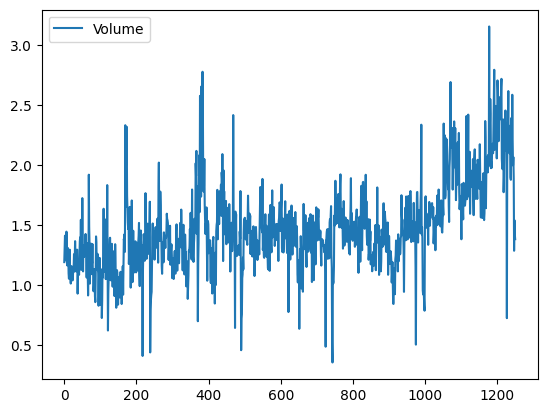

In [349]:
Smarket = load_data('Smarket')
Smarket.select_dtypes(include=[np.number]).corr() # Had to remove the qualitative direction variable
print(Smarket.shape)
Smarket.plot(y='Volume'); # shows that in general there is an increase

##### Logistic Regression

In [350]:
# Logistic Regression
# We are fitting a model with X = Lag 1 to 5 and Volume to predict Direction.
# sm.GLM fits GLMs
# sm.Logit fits logistic regression models

allvars = Smarket.columns.drop(['Today', 'Direction', 'Year'])
design = MS(allvars)
X = design.fit_transform(Smarket)
y = Smarket.Direction == 'Up'

glm = sm.GLM (y,
              X,
              family = sm.families.Binomial()) # binomial = logistic

results = glm.fit()
summarize(results)

# The smallest p-value is 0.15 associated with Lag1, but this is not significant and shows no evidence for real association

,coef,std err,z,P>|z|
intercept,-0.1260,0.241,-0.523,0.601
Lag1,-0.0731,0.050,-1.457,0.145
Lag2,-0.0423,0.050,-0.845,0.398
Lag3,0.0111,0.050,0.222,0.824
Lag4,0.0094,0.050,0.187,0.851
Lag5,0.0103,0.050,0.208,0.835
Volume,0.1354,0.158,0.855,0.392


In [351]:
results.params, results.pvalues

(intercept   -0.126000
 Lag1        -0.073074
 Lag2        -0.042301
 Lag3         0.011085
 Lag4         0.009359
 Lag5         0.010313
 Volume       0.135441
 dtype: float64,
 intercept    0.600700
 Lag1         0.145232
 Lag2         0.398352
 Lag3         0.824334
 Lag4         0.851445
 Lag5         0.834998
 Volume       0.392404
 dtype: float64)

In [352]:
# predict() can return predictions given the values of the predictors.
# No data supplied = probabilities computed for training data used to fit logistic regression model

probs = results.predict()
labels = np.array(['Down']*1250)
labels[probs>0.5] = 'Up'

probs[:10], labels[:10]

(array([0.50708413, 0.48146788, 0.48113883, 0.51522236, 0.51078116,
        0.50695646, 0.49265087, 0.50922916, 0.51761353, 0.48883778]),
 array(['Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Down'],
       dtype='<U4'))

In [353]:
confusion_table(labels,Smarket.Direction), np.mean(labels == Smarket.Direction)
# This shows us that the model predicted the movement 52.2% of the time
# But this is based off our training data. That is, 100 - 52.2 = 47.8% 
# is our training error rate which tends to be optimistic.
# To better assess the error rate, we can separate the data into training
# and test data.

(Truth      Down   Up
 Predicted           
 Down        145  141
 Up          457  507,
 np.float64(0.5216))

In [354]:
train = (Smarket.Year < 2005)
Smarket_train = Smarket.loc[train]
Smarket_test = Smarket.loc[~train]
Smarket_train.shape, Smarket_test.shape

((998, 9), (252, 9))

In [355]:
X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]

glm_train = sm.GLM(y_train,
                   X_train,
                   family = sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test) # exog = (the test data we want to make predictions on)

D = Smarket.Direction
L_train, L_test = D.loc[train], D.loc[~train]
labels = np.array(["Down"]*252)
labels[probs > 0.5] = "Up"
confusion_table(labels, L_test), 
np.mean(labels == L_test)

# The != notation means not equal to, and so the last command computes != the test set error rate. The results are rather disappointing: the test error
# rate is 52%, which is worse than random guessing! Of course this result
# is not all that surprising, given that one would not generally expect to be
# able to use previous days’ returns to predict future market performance.
# (After all, if it were possible to do so, then the authors of this book would
# be out striking it rich rather than writing a statistics textbook.)
# ^ this is peak

np.float64(0.4801587301587302)

In [356]:
model = MS(["Lag1", "Lag2"]).fit(Smarket)
X = model.transform(Smarket)
X_train, X_test = X.loc[train], X.loc[~train]
glm_train = sm.GLS(y_train,
                   X_train,
                   family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)
labels = np.array(["Down"] * 252)
labels[probs > 0.5] = "Up"
confusion_table(labels, Smarket.Direction.loc[~train])
np.mean(labels == Smarket.Direction.loc[~train])

c:\Users\abull\Documents\GitHub\Notes-on-Stats-and-AI\.venv\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


np.float64(0.5595238095238095)

In [357]:
newdata = pd.DataFrame({"Lag1":[1.2,1.5],
                        "Lag2":[1.1, -0.8]})

newX = model.transform(newdata)
results.predict(newX)

0    0.479214
1    0.496118
dtype: float64

##### Linear Discriminant Analysis

In [ ]:
# LDA

# Initialise


lda = LDA(store_covariance=True) 


train = (Smarket.Year < 2005)
D = Smarket.Direction
L_train, L_test = D.loc[train], D.loc[~train]

model = MS(["Lag1", "Lag2"]).fit(Smarket)
X = model.transform(Smarket)
X_train, X_test = X.loc[train], X.loc[~train]

# LDA automatically adds an intercept
# We remove the column corresponding to the intercept in X_train and X_test
X_train, X_test = [M.drop(columns=["intercept"]) for M in [X_train, X_test]]
lda.fit(X_train, L_train)

# X_train = training set, L_train = outcome (classes) for training set

lda.means_, lda.classes_
# lda.means_ returns estimated means for each class k ("Down" and "Up") in this case
# So market going down associated with previous 2 days being positive and vice versa
# eg. 0.04279 is the MEAN for LAG1 when DOWN

(array([[ 0.04279022,  0.03389409],
        [-0.03954635, -0.03132544]]),
 array(['Down', 'Up'], dtype='<U4'))

In [359]:
lda.priors_ 
# Priors demonstrate the % of each in the separate classes within the training set
# ie. Down = 0.492, Up = 0.508

array([0.49198397, 0.50801603])

In [360]:
lda.scalings_
# These are the weights attributed to the model. 
# ie. score = -0.64 x Lag1 - 0.51 x Lag2
# high score = Up, low score = Down

array([[-0.64201904],
       [-0.51352928]])

In [361]:
lda_pred = lda.predict(X_test)

confusion_table(lda_pred, L_test)


Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


In [362]:
lda_prob = lda.predict_proba(X_test)
# LDA predicts the class with the highest posterior probability
# lda.predict_proba(X_test) returns an array of arrays with probabilities for each class, for each observation
# eg. [0.42, 0.58] for the first observation means the probability it belongs to class 2 is 58%.
# lda.predict(X_test) will be equal to lda_prob if you set the threshold to >= 0.5
np.all(np.where(lda_prob[:,1] >= 0.5, "Up", "Down") == lda_pred)

np.True_

In [363]:
# For more than 2 classes, choose the posterior with the highest probability: 
np.all([lda.classes_[i] for i in np.argmax(lda_prob,1)] == lda_pred)

np.True_

In [364]:
np.sum(lda_prob[:,0] > 0.9) # Counts number of "Down" with a probability of 0.9 (= 0)

np.int64(0)

- The LDA classifier is from the `sklearn` library
- Methods create a generic classifier with no reference to data
- Classifier is fit to data with `fit()`
- Predictions are predicted with `predict()`
- This uniformity across objects from the `sklearn` library allows copying of classifier to be used on different data (eg. for cross-validation)

##### Quadratic Discriminant Analysis

In [365]:
qda = QDA(store_covariance=True)
qda.fit(X_train, L_train)
qda.means_, qda.priors_

(array([[ 0.04279022,  0.03389409],
        [-0.03954635, -0.03132544]]),
 array([0.49198397, 0.50801603]))

In [366]:
qda.covariance_[0] # qda estimates a covariance per class

array([[ 1.50662277, -0.03924806],
       [-0.03924806,  1.53559498]])

In [367]:
qda_pred = qda.predict(X_test) # lda_predict works the same as lda.predict()
confusion_table(qda_pred, L_test), np.mean(qda_pred == L_test)

(Truth      Down   Up
 Predicted           
 Down         30   20
 Up           81  121,
 np.float64(0.5992063492063492))

##### Naive Bayes

In [368]:
NB = GaussianNB()
NB.fit(X_train, L_train)
NB.classes_, NB.class_prior_
# Parameters for NB:
NB.theta_, NB.var_

(array([[ 0.04279022,  0.03389409],
        [-0.03954635, -0.03132544]]),
 array([[1.50355429, 1.53246749],
        [1.51401364, 1.48732877]]))

In [369]:
X_train[L_train == "Down"].mean() # demonstrates that the first line of theta is "Down"
X_train[L_train == "Down"].var(ddof=0) # demonstrates that the first line of var is "Down"

Lag1    1.503554
Lag2    1.532467
dtype: float64

In [370]:
nb_labels = NB.predict(X_test)
confusion_table(nb_labels, L_test), np.mean(nb_labels == L_test)


(Truth      Down   Up
 Predicted           
 Down         29   20
 Up           82  121,
 np.float64(0.5952380952380952))

In [371]:
# NB also has a predict_proba value
np.all(np.where(np.argmax(NB.predict_proba(X_test), 1), "Up", "Down") == NB.predict(X_test))

np.True_

##### K-Nearest-Neighbours

In [372]:
knn1 = KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train, L_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred, L_test), np.mean(knn1_pred == L_test)

# KNN does not perform well on Smarket data, but often provides really good results

(Truth      Down  Up
 Predicted          
 Down         48  55
 Up           63  86,
 np.float64(0.5317460317460317))

In [373]:
Caravan = load_data("Caravan")
Purchase = Caravan.Purchase
Purchase.value_counts()
feature_df = Caravan.drop(columns=["Purchase"])

In [ ]:
# A problem with KNN is that a variable may be large in value but relatively small in context (eg. salary and age)
# This is fixed by standardizing the data so all variables have mean 0 and sd 1.
scaler = StandardScaler(with_mean = True, with_std = True, copy = True)
scaler.fit(feature_df)
X_std = scaler.transform(feature_df)

feature_std = pd.DataFrame(X_std, columns= feature_df.columns)

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,0.680906,-0.27258,0.406697,-1.216964,0.779405,-0.694311,0.217444,-0.068711,-0.161816,0.427670,...,-0.202910,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
1,0.992297,-0.27258,-0.859500,-1.216964,0.779405,0.302552,-0.365410,-0.068711,0.464159,-0.096077,...,-0.202910,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
2,0.992297,-0.27258,-0.859500,-1.216964,0.779405,-0.694311,-0.365410,0.914172,0.464159,-1.667319,...,-0.202910,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
3,-1.187437,-0.27258,0.406697,0.010755,-0.970980,1.299414,-0.948264,0.914172,0.464159,-0.619824,...,-0.202910,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
4,1.225840,-0.27258,1.672893,-1.216964,1.479559,0.302552,-0.365410,-0.068711,0.464159,0.427670,...,-0.202910,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,0.914449,-0.27258,-2.125697,-1.216964,0.779405,-0.694311,0.800298,-0.068711,-0.787790,-2.714813,...,5.094585,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
5818,0.836602,-0.27258,1.672893,1.238473,0.779405,0.302552,-0.365410,-0.068711,0.464159,-0.096077,...,-0.202910,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
5819,0.680906,-0.27258,0.406697,1.238473,0.779405,-0.694311,0.800298,-1.051594,-0.161816,-0.619824,...,-0.202910,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
5820,0.758754,-0.27258,0.406697,-1.216964,0.779405,-0.694311,1.383152,-1.051594,-0.787790,0.427670,...,-0.202910,-0.073165,-0.081055,-0.05992,-1.014358,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816


In [375]:
(X_train, X_test, y_train, y_test) = train_test_split(feature_std, Purchase, test_size=1000, random_state=0)
# automatically splits the data set into the train/test set
# non kwargs must be indexable (list, array, pd df)
# test_size sets the number of observations
# random_state behaves as the seed

knn1 = KNeighborsClassifier(n_neighbors = 1)
knn1_pred = knn1.fit(X_train, y_train).predict(X_test)
np.mean(y_test != knn1_pred), np.mean(y_test != "No")
# While the 11% error rate appears good, our error rate would be 
# 7% just by predicting No (null rate).

(np.float64(0.111), np.float64(0.067))

In [376]:
confusion_table(knn1_pred, y_test)
# This means that the positive predictive value is 9 / (53+9) = 0.145 (double than random guessing)

Truth,No,Yes
Predicted,,
No,880,58
Yes,53,9


In [377]:
# Tuning parameters

# Number of neighbors in KNN = tuning parameter/hyperparameter
#   - We do not know what value to use a priori
#   - We can use a for loop to see K = 1 to 5:

for K in range(1,6):
    knnVar = KNeighborsClassifier(n_neighbors = K)
    knnVar_pred = knnVar.fit(X_train, y_train).predict(X_test)
    C = confusion_table(knnVar_pred, y_test)
    templ = ("K={0:d}. Pred: {1:>2}, Actual: {2:d}, Accuracy: {3:.1%}")
    pred = C.loc["Yes"].sum() # selects the number of "Yes" predictions, then sums
    did_rent = C.loc["Yes", "Yes"] # total correct "Yes" predictions
    print(templ.format(
        K,
        pred,
        did_rent,
        did_rent/pred
    ))

K=1. Pred: 62, Actual: 9, Accuracy: 14.5%
K=2. Pred:  6, Actual: 1, Accuracy: 16.7%
K=3. Pred: 20, Actual: 3, Accuracy: 15.0%
K=4. Pred:  4, Actual: 0, Accuracy: 0.0%
K=5. Pred:  7, Actual: 1, Accuracy: 14.3%


In [378]:
# Comparison to Logistic Regression

logit = LogisticRegression(C=1e10, solver="liblinear")
logit.fit(X_train, y_train)
logit_pred = logit.predict_proba(X_test)
logit_labels = np.where(logit_pred[:,1] > 0.25, "Yes", "No")
confusion_table(logit_labels, y_test)

# When set to 0.5, our model returned no predictions. 
# When set to > 0.25, we get an accuracy of 0.310!

Truth,No,Yes
Predicted,,
No,913,58
Yes,20,9


##### Linear + Poisson Regression on Bikeshare Data

In [22]:
Bike = load_data("Bikeshare")
Bike.shape, Bike.columns

((8645, 15),
 Index(['season', 'mnth', 'day', 'hr', 'holiday', 'weekday', 'workingday',
        'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
        'registered', 'bikers'],
       dtype='object'))

In [23]:
# Linear Regression

X = MS(["mnth", "hr", "workingday","temp", "weathersit"]).fit_transform(Bike)
Y = Bike["bikers"]
M_lm = sm.OLS(Y, X).fit()
summarize(M_lm)

,coef,std err,t,P>|t|
intercept,-68.6317,5.307,-12.932,0.000
mnth[Feb],6.8452,4.287,1.597,0.110
mnth[March],16.5514,4.301,3.848,0.000
mnth[April],41.4249,4.972,8.331,0.000
mnth[May],72.5571,5.641,12.862,0.000
mnth[June],67.8187,6.544,10.364,0.000
mnth[July],45.3245,7.081,6.401,0.000
mnth[Aug],53.2430,6.640,8.019,0.000
mnth[Sept],66.6783,5.925,11.254,0.000
mnth[Oct],75.8343,4.950,15.319,0.000


In [25]:
hr_encode = contrast("hr", "sum")
mnth_encode = contrast("mnth", "sum")

X2 = MS([mnth_encode, hr_encode, "workingday","temp","weathersit"]).fit_transform(Bike)
M2_lm = sm.OLS(Y, X2).fit()
S2 = summarize(M2_lm)
S2
# This model does not have mnth[Dec] and hr[23]. 
# The coefficients for these are the negatives of the sums of
# all the other coefficients for the same estimate.
# This allows the sum of all the coefficients to equal to 0.
# For interpretation, this means that the coefficients are relative
# to the yearly average (eg. Jan has 46 less than the yearly avg)

,coef,std err,t,P>|t|
intercept,73.5974,5.132,14.340,0.000
mnth[Jan],-46.0871,4.085,-11.281,0.000
mnth[Feb],-39.2419,3.539,-11.088,0.000
mnth[March],-29.5357,3.155,-9.361,0.000
mnth[April],-4.6622,2.741,-1.701,0.089
mnth[May],26.4700,2.851,9.285,0.000
mnth[June],21.7317,3.465,6.272,0.000
mnth[July],-0.7626,3.908,-0.195,0.845
mnth[Aug],7.1560,3.535,2.024,0.043
mnth[Sept],20.5912,3.046,6.761,0.000


In [382]:
np.sum((M_lm.fittedvalues - M2_lm.fittedvalues)**2), np.allclose(M_lm.fittedvalues, M2_lm.fittedvalues)
# The sum of squared differences is zero  
# So the choice of encoding doesnt matter

(np.float64(5.1709616094685985e-20), True)

Text(0, 0.5, 'Coefficient')

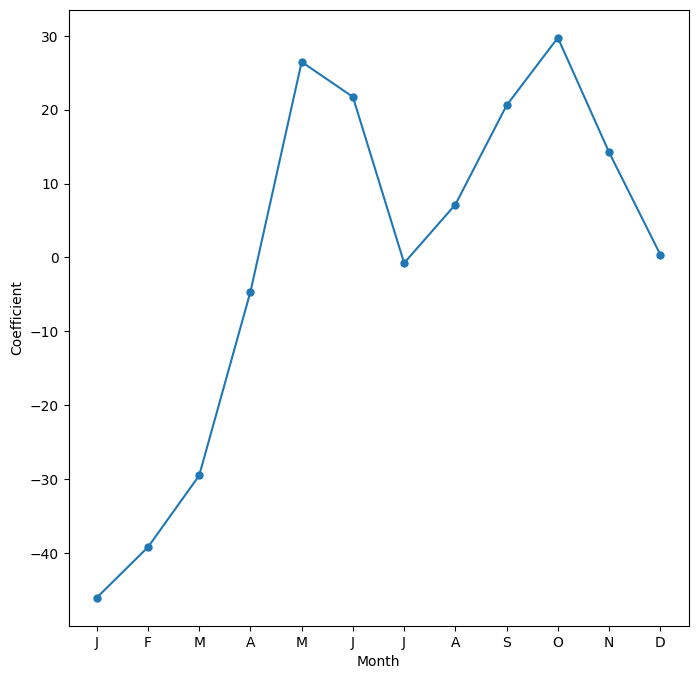

In [383]:
# Goal: make the graph shown on Fig 4.13
# Subgoals: extract coeffs from Jan-Nov, compute Dec manually

#months = Bike["mnth"].dtype.categories
coef_month = S2.loc[S2.index.str.contains("mnth")]['coef']
coef_month = pd.concat([coef_month, pd.Series([-coef_month.sum()],index=["mnth[Dec]"])])
coef_month

fig_month, ax_month = subplots(figsize=(8,8))
x_month = np.arange(coef_month.shape[0])
ax_month.plot(x_month, coef_month,marker=".", ms=10)
ax_month.set_xticks(x_month);
ax_month.set_xticklabels([l[5] for l in coef_month.index]);
ax_month.set_xlabel("Month")
ax_month.set_ylabel("Coefficient")

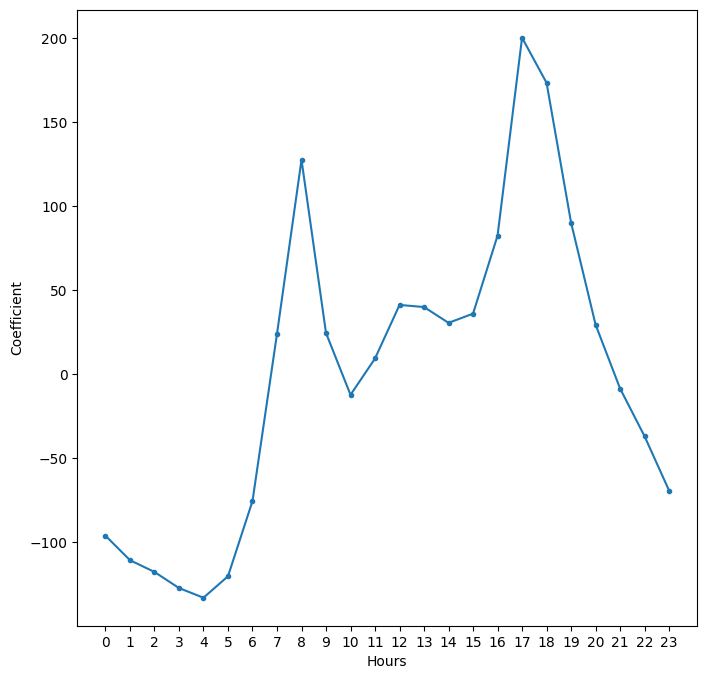

In [384]:
# Goal: Right hand plot of Fig 4.13


hours = S2.loc[S2.index.str.contains("hr")]["coef"]
hours = pd.concat([hours, pd.Series([-hours.sum()], index=["hr[23]"])])
x_hr = np.arange(hours.shape[0])
fig_hrs, ax_hrs = subplots(figsize=(8,8))
ax_hrs.plot(np.arange(24), hours, marker=".")
ax_hrs.set_xticks(np.arange(24));
# vvvv i'm stupid
# hours.index.map(lambda x: x.split("[")[1]).map(lambda y: y.split("]")[0])
ax_hrs.set_xlabel("Hours")
ax_hrs.set_ylabel("Coefficient");

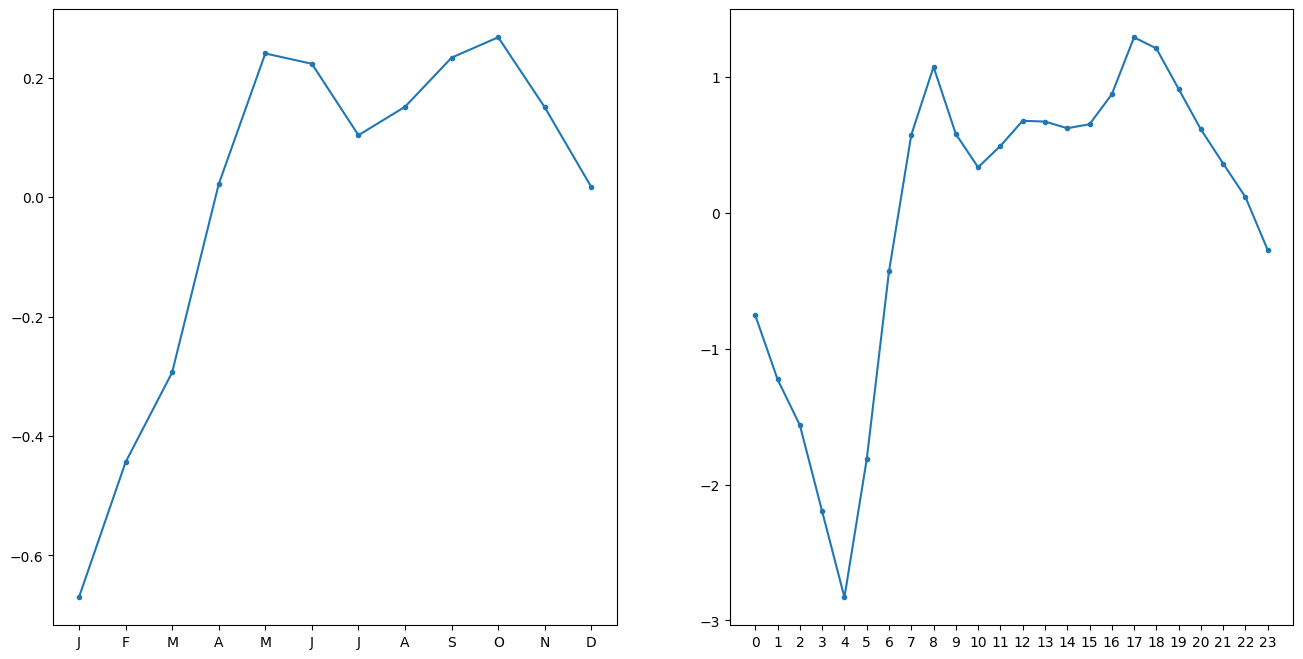

In [385]:
# Poisson Regression

M_pois = sm.GLM(Y, X2, family=sm.families.Poisson()).fit()
S_pois = summarize(M_pois)
coef_month = S_pois[S_pois.index.str.contains("mnth")]["coef"]
coef_month = pd.concat([coef_month, pd.Series([-coef_month.sum()], index=["mnth[Dec]"])])
coef_hrs = S_pois[S_pois.index.str.contains("hr")]["coef"]
coef_hrs = pd.concat([coef_hrs, pd.Series([-coef_hrs.sum()],index=["hr[23]"])])

fig_pois, (ax_month, ax_hr) = subplots(1,2, figsize=(16,8))
ax_month.plot(x_month, coef_month, marker=".")
ax_month.set_xticks(x_month)
ax_month.set_xticklabels(l[5] for l in coef_month.index)

ax_hr.plot(x_hr, coef_hrs, marker=".")
ax_hr.set_xticks(x_hr)
ax_hr.set_xticklabels(np.arange(24));


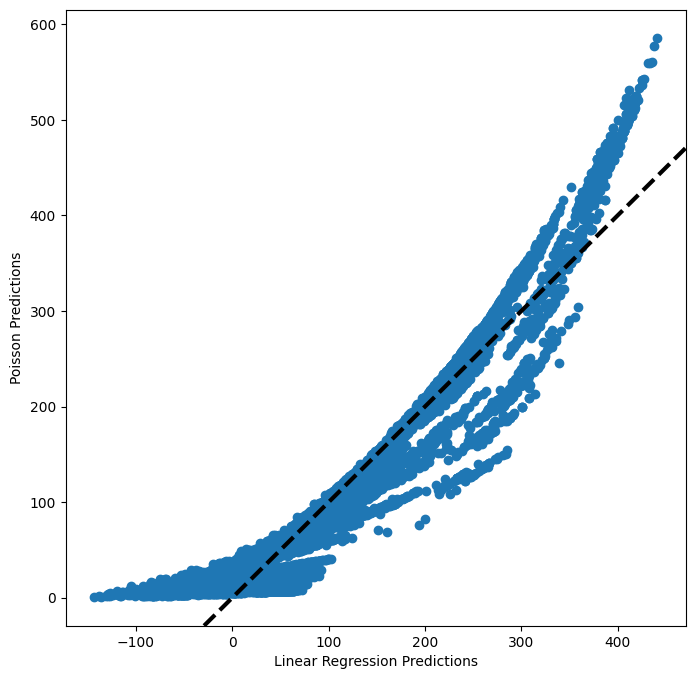

In [386]:
fig, ax = subplots(figsize=(8,8))
ax.scatter(M2_lm.fittedvalues, M_pois.fittedvalues)
ax.set_xlabel("Linear Regression Predictions")
ax.set_ylabel("Poisson Predictions")
ax.axline([0,0], c="black", linewidth=3, linestyle="--", slope=1);


# From here we can see that poisson approximately maps the linear
# fit but poisson is positive for all predictions.

#### 4.8a Conceptual Exercises

1. Trivial.

2. Also apparently trivial. Keep dropping terms in 4.17 which do not include k (eg. first drop the denominator), then take logs.

3. Also trivial. Follow process on 2) but one the x^2 term now is not cancelled out as the variances are different, and the x^2 term now depends on the variances.

4. a) 10% - if the observations are uniform, then sampling a range which accounts for 10% of the distribution results in a sample of 10% of observations
   
   b) 1% - For 2 dimensions following the same logic, we would have 10%^2.

   c) 10% ^ 100.

   d) When p is very large, for any given n, only a small proportion of n will be sampled and used to determine the class of any prediction.

   e) 0.1 ^ (1/p) - to sample 10% of the population, you would need to consider a larger range of observations for each dimension. For 0.1^(1/100), you would be considering almost all of the observations per dimension.

5. a) Linear - QDA performs better on training (more flexible), LDA performs better on test (closer to true)
   
   b) Non-linear - QDA outperforms LDA on training and test

   c) QDA should outperform LDA in general due to flexibility ? [Ans: that was right]

   d) False - overfitting.

6. a) Using: 
$$p(X) = \frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1X}}$$
We get 0.378.
   b) h = 50.

7.
$$p_k(x)=\frac{\pi_kf_k(x)}{\sum^{K}_{l=1}\pi_l f_l(x)}$$
We have:
$$\pi_k = 80\%, \hat{\mu}_1=10,\hat{\mu}_2=0,\hat{\sigma}^2=36$$
$$p_k(x) = \frac{0.8 \times \frac{1}{\sqrt{2\pi(36)^2}}e^{\frac{-(4-(10))^2}{2(36)^2}}}{0.2 \times \frac{1}{\sqrt{2\pi(36)^2}}e^{\frac{-(4-(0))^2}{2(36)^2}} + 0.8 \times \frac{1}{\sqrt{2\pi(36)^2}}e^{\frac{-(4-(10))^2}{2(36)^2}}}$$
$$\approx 0.80$$

8. Intuitively it looks like logistic's 30% is worse than KNN's 18% (on average). Obviously, there must be a reason they ask this question. Is the error rate for training data for KNN with K = 1 0%? That would mean that the test error rate was actually 36%? [Ans: yes, 1-NN does have a 0% training data error rate because the nearest neighbour to all training points are the training points themselves]


9.  a) 0.37 / 1.37 
    
    b) 0.16 / 0.84

10.  

#### 4.8b Applied Exercises

#### SUMMARY


- KNN
  - Based on class of K nearest neighbours
  - No assumptions, non-parametric
  - Good for non-linear, high n, low p
- Logistic
  - Models probability by logistic function
  - Assumes linear relationship between X and log odds
  - Linear decision boundary
- LDA
  - Assumes normality, equal (shared) covariances
  - Finds linear combination of features that performs best
  - Outperforms logistic if normality holds
  - Linear decision boundary
- QDA
  - Assumes normality, class-specific covariance matrices
  - Good for non-linear, low n (but higher n tends to favour QDA over LDA), low p?
  - Non-linear (quadratic) decision boundaries
- Naive Bayes
  - Assumes independence of predictors
  - Worse than LDA, QDA if high p, low n


ROC Curve
- True positive rate against false positive rate
- Good fit = hugs left and top sides
- Poor fit = line shaped like y = x
- AUC (Area under Curve) close to 1 = good fit, close to 0.5 = poor fit

#### PYTHON CHEATSHEET

In [74]:
## ## ## ## ## ## ## ## Base Imports + Setup ## ## ## ## ## ## ## ##

import numpy as np
import pandas as pd

from ISLP import load_data
import statsmodels.api as sm
from ISLP.models import contrast

data = load_data('Smarket')
predictor_columns = data.columns.drop(['Today', 'Direction', 'Year'])

X = data[predictor_columns]
X = sm.add_constant(X) # Adds the "const" column
y = (data.Direction == 'Up') # outcome to be predicted

print(X, y)

      const   Lag1   Lag2   Lag3   Lag4   Lag5   Volume
0       1.0  0.381 -0.192 -2.624 -1.055  5.010  1.19130
1       1.0  0.959  0.381 -0.192 -2.624 -1.055  1.29650
2       1.0  1.032  0.959  0.381 -0.192 -2.624  1.41120
3       1.0 -0.623  1.032  0.959  0.381 -0.192  1.27600
4       1.0  0.614 -0.623  1.032  0.959  0.381  1.20570
...     ...    ...    ...    ...    ...    ...      ...
1245    1.0  0.422  0.252 -0.024 -0.584 -0.285  1.88850
1246    1.0  0.043  0.422  0.252 -0.024 -0.584  1.28581
1247    1.0 -0.955  0.043  0.422  0.252 -0.024  1.54047
1248    1.0  0.130 -0.955  0.043  0.422  0.252  1.42236
1249    1.0 -0.298  0.130 -0.955  0.043  0.422  1.38254

[1250 rows x 7 columns] 0        True
1        True
2       False
3        True
4        True
        ...  
1245     True
1246    False
1247     True
1248    False
1249    False
Name: Direction, Length: 1250, dtype: bool


In [75]:
## ## ## ## ## ## ## ## Train/Test Splitter ## ## ## ## ## ## ## ##

from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=int(len(X)*0.2), random_state=0)
# print(X_train, X_test, y_train, y_test)
## Alternative manual train/test split:
# train = (Smarket.Year < 2005) ## (or something else to select a certain sample of the dataset)
# X_train, X_test = X.loc[train], X.loc[~train]
# y_train, y_test = y.loc[train], y.loc[~train]

## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ##

In [76]:
## ## ## ## ## ## ## ## Logistic Regression ## ## ## ## ## ## ## ##

## ## ## ## Logistic Regression through sm.GLM
import statsmodels.api as sm
logit = sm.GLM(y_train,
              X_train,
              family = sm.families.Binomial()) ## binomial = logistic
results = logit.fit()

## ## 
# print(results.summary()) ## Shows entire summary of the regression model
# print(results.params) ## Takes coefficients (see summary)
# print(results.pvalues) ## Takes pvalues (see summary)
# print(results.predict(exog = X_test)) ## Gives probabilities for each datapoint. Closer to 1 (eg. > 0.5) means "Up" as defined by y = ... earlier

## ## The following translates True/False predictions into an array
probs = results.predict(exog = X_test)
labels = np.array(["Down"]*len(X_test))
labels[probs > 0.5] = "Up" 

## ## Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_y_true = y_test.map(lambda x: "Up" if x else "Down")
conf_y_pred = labels
# print(confusion_matrix(conf_y_true, conf_y_pred))
## Conventionally, confusion_matrix(y_true, y_pred)
## The rows represent the actual data, the columns represent predicted data
## The table is ordered alphabetically
## So, in the case above, we get:
##             Pred Down  Pred Up
## Actual Down     26        97
## Actual Up       33        94

# print(np.mean(conf_y_true == conf_y_pred)) ## Gives the average amount of correct predictions

## Predicting new data with only 2 of the predictors, for new data
newmodel = X[["Lag1", "Lag2"]]
newX = sm.add_constant(newmodel)
(newX_train, newX_test, newy_train, newy_test) = train_test_split(newX, y, test_size=int(len(newX)*0.2), random_state=0)
newLogit = sm.GLM(newy_train,
                  newX_train,
                  family=sm.families.Binomial())
newresults = newLogit.fit()
newdata = pd.DataFrame({"Lag1":[1.2,1.5],
                        "Lag2":[1.1, -0.8]})
newdata = sm.add_constant(newdata)
# print(newresults.predict(newdata))

## ## ## ## Logistic Regression through LogisticRegression
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C=1e10, solver="liblinear")
logit.fit(X_train, y_train)
logit_pred = logit.predict_proba(X_test) ## Probabilities for each class

## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ##




In [77]:
## ## ## ## ## ## ## ## LDA ## ## ## ## ## ## ## ##
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(store_covariance=True)

L_train, L_test = data.loc[X_train.index].Direction, data.loc[X_test.index].Direction
## We already have X_train and X_test from the earlier split.
## We take the direction for the corresponding indices in each group

ldaModel = X[["Lag1", "Lag2"]] ## We are only using Lag1 and Lag2 as predictors here.
ldaX = sm.add_constant(ldaModel)
ldaX_train, ldaX_test = ldaX.loc[X_train.index], ldaX.loc[X_test.index]
ldaX_train, ldaX_test = [M.drop(columns=["const"]) for M in [ldaX_train, ldaX_test]]
lda.fit(ldaX_train, L_train) ## Fitting the training predictors and outcomes together
## We set up the actual datapoints for the train/test which correspond
## to the same indices as that of L_train, L_test.
## We drop the const columns as lda automatically adds an intercept.

# print(lda.means_)
## lda.means_ returns estimated means for each class k ("Down" and "Up") in this case
## So market going down associated with previous 2 days being positive and vice versa
## ie. 0.0454 is the MEAN for LAG1 when DOWN, 0.0445 is the MEAN for LAG2 when DOWN
## ie. -0.0359 is the MEAN for LAG1 when UP, -0.0270 is the MEAN for LAG2 when UP

# print(lda.classes_) 
## Confirms the order of classes

# print(lda.priors_) 
## Priors demonstrate the % of each in the separate classes within the training set
## ie. Down = 0.479, Up = 0.521 

# print(lda.scalings_)
## These are the weights attributed to the model. 
## ie. score = (-0.65 x Lag1) + (-0.60 x Lag2)
## High score = Up, Low score = Down

lda_pred = lda.predict(ldaX_test) # Predict for given data set (in this case, test data)
# print(confusion_matrix(L_test, lda_pred)) ## Confusion matrix

lda_prob = lda.predict_proba(ldaX_test)
# print(lda_prob)
## An array of arrays with probabilities for each class, for each observation
## Again, order in this case is "Down", "Up", so the second value in each observation is 
## the predicted "Up" value.

# lda.predict bases off the maximum value to classify the observation
# This allows it to works for multiple classes:
np.all([lda.classes_[i] for i in np.argmax(lda_prob, 1)] == lda_pred)

np.True_

In [78]:
## ## ## ## ## ## ## ## QDA ## ## ## ## ## ## ## ##
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

# All the functions for LDA can be used for QDA. 
# The only thing unique is qda.covariance_[i] does estimate a covariance per class
# (where qda is QDA(store_covariance=true).fit(X_train, y_train))

In [79]:
## ## ## ## ## ## ## ## NB ## ## ## ## ## ## ## ##
from sklearn.naive_bayes import GaussianNB

nbX = X[["Lag1", "Lag2"]]
nbX_train, nbX_test = nbX.loc[X_train.index], nbX.loc[X_test.index]


NB = GaussianNB()
NB.fit(nbX_train, L_train)
## Remember, nbX_train is our subset of the X population used for training.
## But only focusing on Lag1 and Lag2
## L_train is the equivalent predictions for each newX_train (Up/Down)

# print(NB.classes_, NB.class_prior_)
# print(NB.theta_, NB.var_) ## Parameters used for NB
# print(nbX_train[L_train == "Down"].mean()) 
## This confirms that the first row of NB.theta_ corresponds to "Down"
# print(nbX_train[L_train == "Down"].var(ddof = 0))
## This confirms that the first row of NB.var_ corresponds to "Down"

nb_labels = NB.predict(nbX_test)
# print(confusion_matrix(nb_labels, L_test), np.mean(nb_labels == L_test))
# print(NB.predict_proba(nbX_test)) ## NB also has predict_proba

In [ ]:
## ## ## ## ## ## ## ## KNN ## ## ## ## ## ## ## ##

## ## ## ## A different data set will be used for KNN
data = load_data("Caravan")
y = data.Purchase # Did they purchase insurance? (Yes/No)
feature_df = data.drop(columns=["Purchase"])


## ## ## ## Scaling
## A problem with KNN is that a variable may be large in value but relatively small in context (eg. $1000 salary and 60y age)
## This is fixed by standardizing the data so all variables have mean 0 and sd 1.
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler(with_mean = True, with_std = True, copy = True).fit(feature_df).transform(feature_df)
feature_std = pd.DataFrame(X_std, columns= feature_df.columns)
(X_train, X_test, y_train, y_test) = train_test_split(feature_std, y, test_size=1000, random_state=0)

## ## ## ## Using KNN 
from sklearn.neighbors import KNeighborsClassifier as KNC
knn = KNC(n_neighbors=1)
knn_pred = knn.fit(X_train, y_train).predict(X_test)
np.mean(y_test != knn_pred), np.mean(y_test != "No")
## While the 11% error rate appears good, our error rate would be 
## 7% just by predicting No (null rate) because of how low the amount
## of "Yes"s there are. For insurance companies, we might be more
## concerned about PPV - given that our model predicts "Yes", 
## what is the probability that they were correct?

confusion_matrix(y_test, knn_pred)
## This tells us our PPV is 9 / (53+9) = 0.145 (double than random guessing)


## ## ## ## Tuning

## Number of neighbors in KNN = tuning parameter/hyperparameter
##   - We do not know what value to use a priori
##   - We can use a for loop to see K = 1 to 5:

for K in range(1,6):
    knnVar = KNC(n_neighbors = K)
    knnVar_pred = knnVar.fit(X_train, y_train).predict(X_test)
    C = confusion_matrix(y_test, knnVar_pred)
    templ = ("K={0:d}. Pred: {1:>2}. Actual: {2:d}. Accuracy: {3:.1%}")
    pred = C[:,1].sum() # Selects the number of "Yes" predictions, then sums
    did_rent = C[1,1] # Total correct "Yes" predictions
    print(templ.format(
        K,
        pred,
        did_rent,
        did_rent/pred
    ))
del C

K=1. Pred: 62. Actual: 9. Accuracy: 14.5%
K=2. Pred:  6. Actual: 1. Accuracy: 16.7%
K=3. Pred: 20. Actual: 3. Accuracy: 15.0%
K=4. Pred:  4. Actual: 0. Accuracy: 0.0%
K=5. Pred:  7. Actual: 1. Accuracy: 14.3%


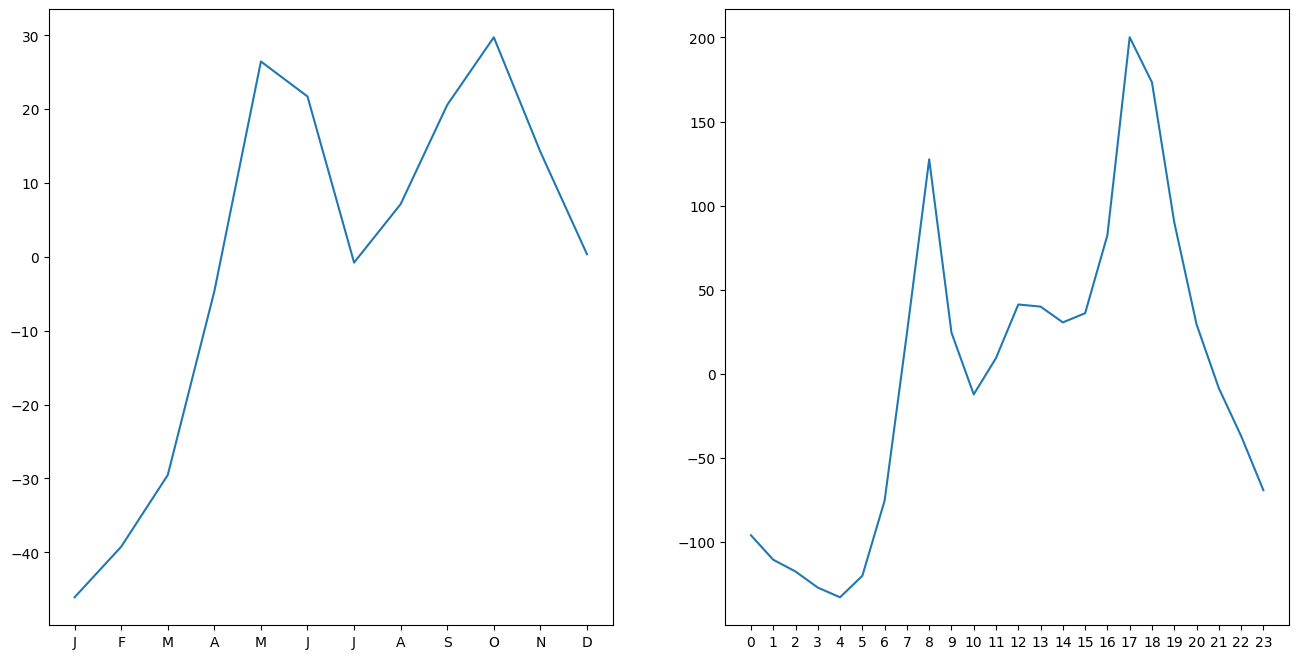

In [81]:
## ## ## ## ## ## ## ## Linear ## ## ## ## ## ## ## ##

## ## ## ## A different data set will be used for Linear Regression
from patsy import dmatrix
data = load_data("Bikeshare")
Y = data["bikers"]
X2 = dmatrix("C(mnth, Sum) + C(hr, Sum) + workingday + temp + weathersit", data, return_type='dataframe')
## We're using a sum encoding here, with dmatrix from patsy to create
## a design matrix where mnth and hr are encoded.
## The coefficients are deviations from the overall mean, and the
## baseline (not included, mnth[Dec] and hr[23]) have a coefficient
## which is the negative of the sum of the other related coefficients.

## ## ## ## Linear Regression
import statsmodels.api as sm
M2_lm = sm.OLS(Y, X2).fit() # Fit a linear regression model (seen before)
#print(M2_lm.summary())

## ## ## ## Plotting Linear Regression Results

coef_month = M2_lm.params[M2_lm.params.index.str.contains("mnth")]
coef_month = pd.concat([coef_month, pd.Series([-coef_month.sum()], index = ["C(mnth, Sum)[S.Dec]"])])
coef_hrs = M2_lm.params[M2_lm.params.index.str.contains("hr")]
coef_hrs = pd.concat([coef_hrs, pd.Series([-coef_hrs.sum()], index = ["C(hr, Sum)[S.23]"])])

from matplotlib.pyplot import subplots
fig, (ax_month, ax_hrs) = subplots(1,2, figsize=(16,8))
ax_month.plot(np.arange(coef_month.shape[0]),coef_month)
ax_month.set_xticks(np.arange(coef_month.shape[0]))
ax_month.set_xticklabels([l[15] for l in coef_month.index])

ax_hrs.plot(np.arange(24), coef_hrs)
ax_hrs.set_xticks(np.arange(24))
ax_hrs.set_xticklabels(np.arange(24));

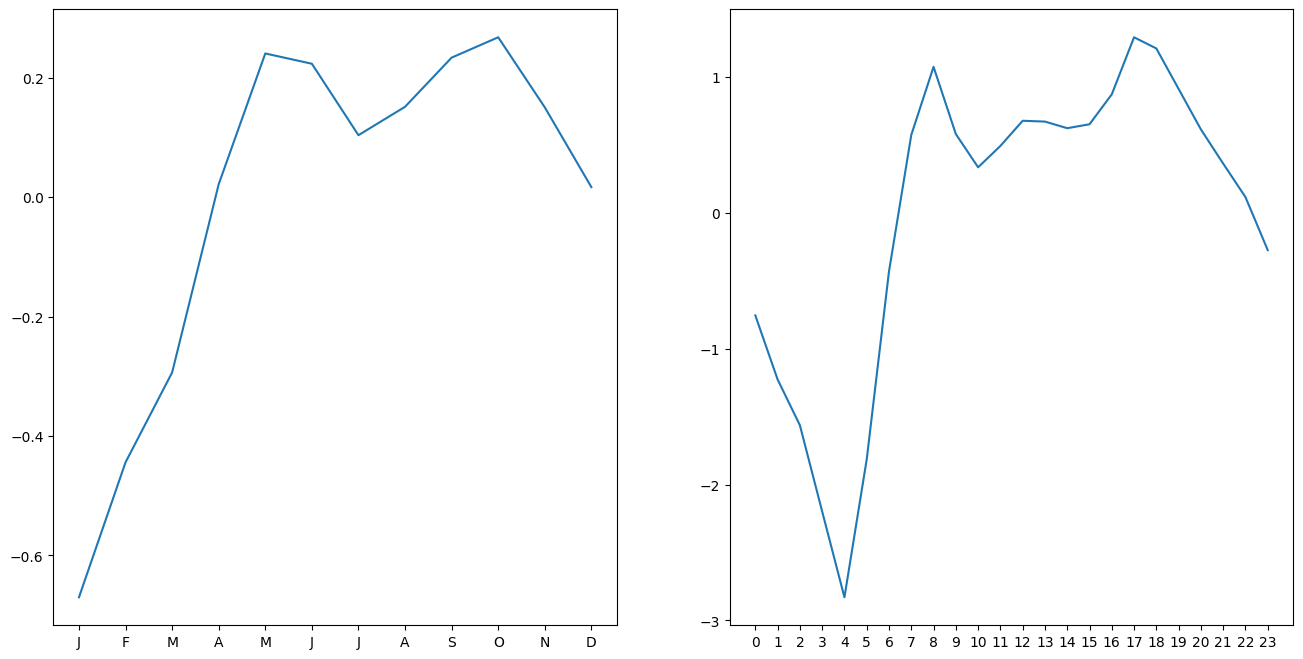

In [ ]:
## ## ## ## ## ## ## ## Poisson ## ## ## ## ## ## ## ##

## ## ## ## We will use the same Bike dataset as linear regression:
from patsy import dmatrix
data = load_data("Bikeshare")
Y = data["bikers"]
X2 = dmatrix("C(mnth, Sum) + C(hr, Sum) + workingday + temp + weathersit", data, return_type='dataframe')

## ## ## ## Poisson Regression
import statsmodels.api as sm
M_pois = sm.GLM(Y, X2, family = sm.families.Poisson()).fit()
# print(M_pois.summary())

## ## ## ## Plotting Poisson Regression Results
coef_month = M_pois.params[M_pois.params.index.str.contains("mnth")]
coef_month = pd.concat([coef_month, pd.Series([-coef_month.sum()], index = ["C(mnth, Sum)[S.Dec]"])])
coef_hrs = M_pois.params[M_pois.params.index.str.contains("hr")]
coef_hrs = pd.concat([coef_hrs, pd.Series([-coef_hrs.sum()], index = ["C(hr, Sum)[S.23]"])])

from matplotlib.pyplot import subplots
fig, (ax_month, ax_hrs) = subplots(1,2, figsize=(16,8))
ax_month.plot(np.arange(coef_month.shape[0]),coef_month)
ax_month.set_xticks(np.arange(coef_month.shape[0]))
ax_month.set_xticklabels([l[15] for l in coef_month.index])

ax_hrs.plot(np.arange(24), coef_hrs)
ax_hrs.set_xticks(np.arange(24))
ax_hrs.set_xticklabels(np.arange(24));